In [2]:
#Importing modules

import numpy as np
import matplotlib.pyplot as plt
import requests
import re
import string

In [3]:
#Importing text using requests.get

book = requests.get('https://www.gutenberg.org/files/35/35-0.txt')

In [4]:
#the text contains 204357 letters
text = book.text
print(len(text))

204357


In [5]:
text[:2000]

'ï»¿The Project Gutenberg eBook of The Time Machine, by H. G. Wells\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: The Time Machine\r\n\r\nAuthor: H. G. Wells\r\n\r\nRelease Date: July, 1992 [eBook #35]\r\n[Most recently updated: October 22, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***\r\n\r\n\r\n\r\n\r\nThe Time Machine\r\n\r\nAn Invention\r\n\r\nby H. G. Wells\r\n\r\n\r\nCONTENTS\r\n\r\n I Introduction\r\n II The Machine\r\n III The Time Traveller Returns\r\n IV 

In [6]:
# character strings to replace with space
strings2replace = [
                 '\r\n\r\nâ\x80\x9c', # new paragraph
                 'â\x80\x9c',         # open quote
                 'â\x80\x9d',         # close quote
                 '\r\n',              # new line
                 'â\x80\x94',         # hyphen
                 'â\x80\x99',         # single apostrophe
                 'â\x80\x98',         # single quote
                 '_',                 # underscore, used for stressing
                 ]


In [7]:
#using regex to replace weird text from above 

for i in strings2replace:
      regexp = re.compile('%s'%i)
      text = regexp.sub(' ',text)


In [8]:
text[:2000]

'ï»¿The Project Gutenberg eBook of The Time Machine, by H. G. Wells  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.  Title: The Time Machine  Author: H. G. Wells  Release Date: July, 1992 [eBook #35] [Most recently updated: October 22, 2020]  Language: English  Character set encoding: UTF-8   *** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***     The Time Machine  An Invention  by H. G. Wells   CONTENTS   I Introduction  II The Machine  III The Time Traveller Returns  IV Time Travelling  V In the Golden Age  VI The Sunset of Mankind  VII A Sudden Shock  VIII Explanation  IX The Morlocks

In [ ]:
# Finding out distribution of word lengths in the text 

In [9]:
words = text.split( )

In [10]:
wordlength=[]
for i in words:
 x = len(i)
 wordlength.append(x)

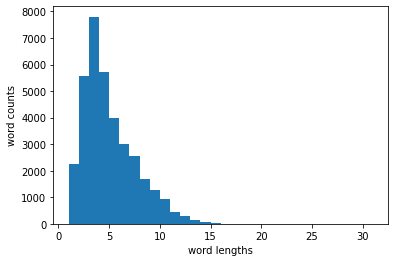

In [11]:
plt.hist(wordlength,bins=30)
plt.xlabel('word lengths')
plt.ylabel('word counts')
plt.show()

In [12]:
#now count the each letter
#using ascii, get all alphabets then using for loops, sum up all the counts of each letter

letters = string.ascii_lowercase
newtext= text.lower()

In [13]:
lettercounts = np.zeros(len(letters))
n=0 
for i in letters:
 lettercounts[n]= newtext.count(i)
 n+=1

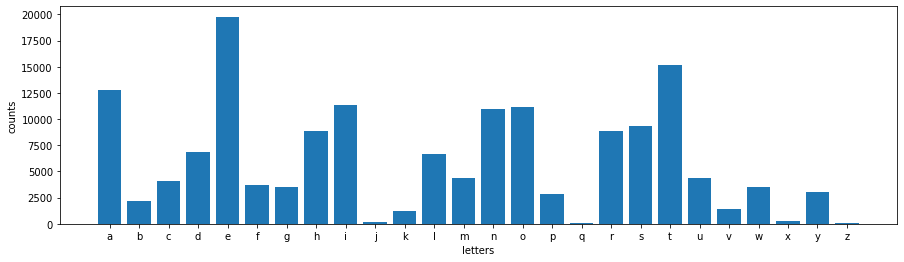

In [14]:
numletters = len(letters)
fig,ax = plt.subplots(1,figsize=(15,4))
plt.bar(range(numletters),lettercounts)
ax.set_xticks(range(numletters))
ax.set_xticklabels(letters)
ax.set_xlabel('letters')
ax.set_ylabel('counts')
plt.show()



In [15]:
#now convert the counts to the probability of each letter in the text

total_letters = lettercounts.sum()
letter_prob = lettercounts/total_letters
letter_prob

array([0.08135922, 0.01385123, 0.02583308, 0.04381863, 0.12620504,
       0.02391905, 0.02240696, 0.05640659, 0.07217185, 0.00119308,
       0.00785392, 0.0424788 , 0.02820011, 0.07025782, 0.07118294,
       0.01829179, 0.00067629, 0.05675112, 0.05941801, 0.09669063,
       0.02761314, 0.00915546, 0.02248352, 0.00179919, 0.01929347,
       0.00068905])

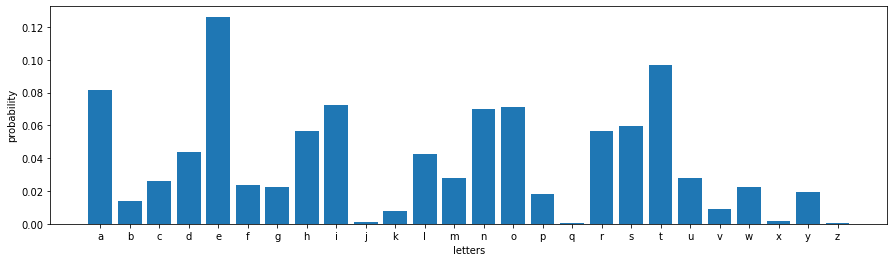

In [16]:
fig,ax = plt.subplots(1,figsize=(15,4))
plt.bar(range(numletters),letter_prob)
ax.set_xticks(range(numletters))
ax.set_xticklabels(letters)
ax.set_xlabel('letters')
ax.set_ylabel('probability')
fig;


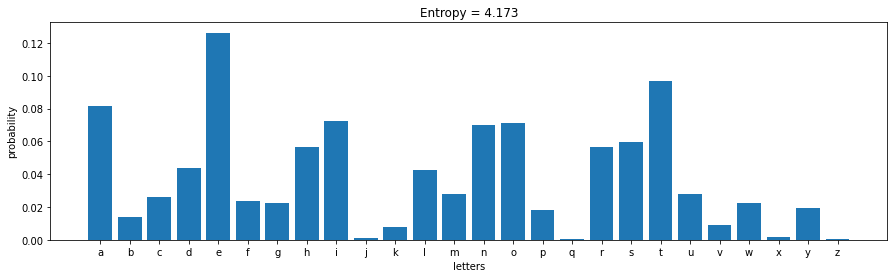

In [17]:
entropy = -sum(letter_prob*np.log2(letter_prob+np.finfo(float).eps))
ax.set_title('Entropy = %.3f'%entropy)
fig

In [18]:
#probability matrix to show which letter is more likely to show up followed by a letter

probmat = np.zeros((numletters,numletters))
for i in range(len(newtext)-1):
  currlet = newtext[i]
  nextlet = newtext[i+1]
  if currlet in letters and nextlet in letters:
      probmat[letters.index(currlet),letters.index(nextlet)] += 1


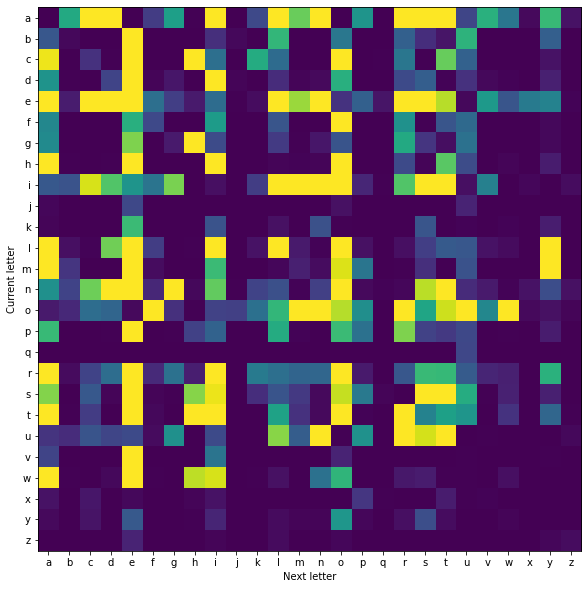

In [19]:
fig,ax = plt.subplots(1,figsize=(10,10))
ax.imshow(probmat,vmax = 500)
ax.set_ylabel('Current letter')
ax.set_xlabel('Next letter')
ax.set_xticks(range(numletters))
ax.set_yticks(range(numletters))
ax.set_xticklabels(letters)
ax.set_yticklabels(letters)
plt.show()



In [21]:
# now convert this to entropy 
condentr = np.zeros(numletters)
for i in range(numletters):
  probs = probmat[i,:]
  probs = probs/ sum(probs)
  condentr[i] = -sum(probs*np.log2(probs+np.finfo(float).eps))


In [22]:
condentr

array([ 3.63355136e+00,  2.94999581e+00,  3.23982864e+00,  2.99732790e+00,
        3.69151116e+00,  2.99733621e+00,  3.12558479e+00,  2.07518829e+00,
        3.37481621e+00,  1.52146062e+00,  2.34295007e+00,  3.27852259e+00,
        2.76144809e+00,  3.36026691e+00,  3.70166456e+00,  3.31191352e+00,
       -3.20342650e-16,  3.51956027e+00,  3.37001234e+00,  2.76053494e+00,
        3.45688384e+00,  1.16968228e+00,  2.71389837e+00,  2.67795321e+00,
        2.70172336e+00,  2.21839596e+00])

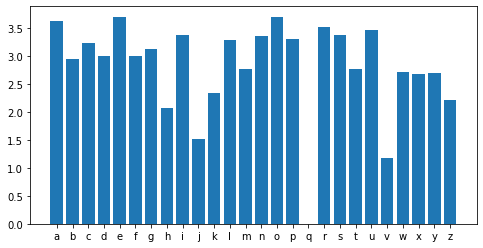

In [24]:
fig,ax = plt.subplots(1,figsize=(8,4))
ax.bar(range(numletters),condentr)
ax.set_xticks(range(numletters))
ax.set_xticklabels(letters)
plt.show()